In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import os
import keras

In [2]:
def score(x_train, x_test, y_train, y_test, model):
    model.fit(x_train, y_train)
    print('Training Score:', model.score(x_train, y_train))
    print('Training Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, model.predict(x_train))))
    print('Test Score:', model.score(x_test, y_test))
    print('Test Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, model.predict(x_test))))

In [3]:
df = pd.read_csv('log_transformed.csv')

In [15]:
test = pd.read_csv('log_test.csv')

In [4]:
df.drop('Id', axis=1, inplace=True)

In [16]:
test.drop('Id', axis=1, inplace=True)

In [5]:
y = df.SalePrice
x = df.drop('SalePrice', axis=1)

In [6]:
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,4.110874,1.386294,4.189655,9.042040,0.693147,1.098612,0.000000,0.693147,0.693147,0.000000,...,1.609438,1.386294,0.000000,1.098612,7.605392,1.609438,1.609438,0.0,0.0,0.0
1,3.044522,1.386294,4.394449,9.169623,0.693147,1.098612,0.000000,0.693147,0.693147,0.693147,...,1.609438,1.386294,0.000000,1.791759,7.604894,1.609438,1.609438,0.0,0.0,0.0
2,4.110874,1.386294,4.234107,9.328212,0.693147,1.098612,0.693147,0.693147,0.693147,0.000000,...,1.609438,1.386294,0.000000,2.302585,7.605392,1.609438,1.609438,0.0,0.0,0.0
3,4.262680,1.386294,4.110874,9.164401,0.693147,1.098612,0.693147,0.693147,0.693147,1.098612,...,1.609438,1.386294,0.000000,1.098612,7.604396,1.609438,0.693147,0.0,0.0,0.0
4,4.110874,1.386294,4.442651,9.565284,0.693147,1.098612,0.693147,0.693147,0.693147,0.693147,...,1.609438,1.386294,0.000000,2.564949,7.605392,1.609438,1.609438,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,1.386294,4.143135,8.976894,0.693147,1.098612,0.000000,0.693147,0.693147,0.000000,...,1.609438,1.386294,0.000000,2.197225,7.604894,1.609438,1.609438,0.0,0.0,0.0
1456,3.044522,1.386294,4.454347,9.486152,0.693147,1.098612,0.000000,0.693147,0.693147,0.000000,...,1.098612,1.386294,0.000000,1.098612,7.606387,1.609438,1.609438,0.0,0.0,0.0
1457,4.262680,1.386294,4.204693,9.109746,0.693147,1.098612,0.000000,0.693147,0.693147,0.000000,...,1.386294,0.693147,7.824446,1.791759,7.606387,1.609438,1.609438,0.0,0.0,0.0
1458,3.044522,1.386294,4.234107,9.181735,0.693147,1.098612,0.000000,0.693147,0.693147,0.000000,...,1.609438,1.386294,0.000000,1.609438,7.606387,1.609438,1.609438,0.0,0.0,0.0


#### With Outliers

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=1)

In [8]:
x_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
6,3.044522,1.386294,4.330733,9.218804,0.693147,1.098612,0.000000,0.693147,0.693147,0.000000,...,1.609438,1.386294,0.000000,2.197225,7.604894,1.609438,1.609438,0.0,0.0,0.000000
807,4.262680,1.386294,4.976734,9.970445,0.693147,1.098612,0.000000,0.693147,0.693147,0.000000,...,1.609438,1.386294,0.000000,1.791759,7.605890,1.609438,1.609438,0.0,0.0,0.000000
955,4.510860,1.098612,4.418841,8.873048,0.693147,1.098612,0.693147,1.386294,0.693147,0.000000,...,1.609438,1.386294,0.000000,2.197225,7.604894,1.609438,1.609438,0.0,0.0,0.000000
1040,3.044522,1.386294,4.488636,9.482350,0.693147,1.098612,0.000000,0.693147,0.693147,1.098612,...,1.386294,1.386294,0.000000,0.693147,7.604396,1.609438,1.609438,0.0,0.0,0.000000
701,3.044522,1.386294,4.394449,9.169623,0.693147,1.098612,0.000000,0.693147,0.693147,0.000000,...,1.609438,1.386294,0.000000,2.079442,7.604396,1.386294,1.609438,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3.044522,1.386294,4.369448,9.224342,0.693147,1.098612,0.000000,0.693147,0.693147,0.000000,...,1.098612,1.386294,0.000000,2.197225,7.605890,1.609438,1.609438,0.0,0.0,0.000000
905,3.044522,1.386294,4.394449,9.202409,0.693147,1.098612,0.000000,0.693147,0.693147,0.000000,...,1.098612,1.386294,0.000000,1.098612,7.606387,1.609438,1.609438,0.0,0.0,0.000000
1096,4.262680,0.693147,4.110874,8.836810,0.693147,1.098612,0.000000,0.693147,0.693147,0.000000,...,1.609438,1.386294,0.000000,1.386294,7.604894,1.609438,1.609438,0.0,0.0,0.693147
235,5.081404,0.693147,3.091042,7.427144,0.693147,1.098612,0.000000,0.693147,0.693147,0.000000,...,1.609438,1.386294,0.000000,2.197225,7.605392,1.609438,1.609438,0.0,0.0,0.000000


In [9]:
lr = LinearRegression()

In [10]:
score(x_train, x_test, y_train, y_test, lr)

Training Score: 0.9045251664029565
Training Root Mean Squared Error: 0.12218198482489515
Test Score: 0.8955216821201339
Test Root Mean Squared Error: 0.1323265167392523


In [17]:
lr.predict(x_train)

array([12.51571417, 12.07070202, 12.01138433, ..., 11.66955498,
       11.35786901, 11.28934785])

In [18]:
lr.predict(test)

array([11.69076464, 11.9813162 , 12.08545906, ..., 12.0164575 ,
       11.77273369, 12.35029445])

In [19]:
sv = SVR()

In [20]:
score(x_train, x_test, y_train, y_test, sv)

Training Score: 0.8876422283158587
Training Root Mean Squared Error: 0.1325452838739856
Test Score: 0.8907003952616598
Test Root Mean Squared Error: 0.13534527238100794


In [21]:
sv1 = SVR(kernel='poly')

In [22]:
score(x_train, x_test, y_train, y_test, sv1)

Training Score: 0.9127399075558782
Training Root Mean Squared Error: 0.11680745327255906
Test Score: 0.9072201500483683
Test Root Mean Squared Error: 0.12469832722550982


In [23]:
sv2 = SVR(gamma='auto')

In [24]:
score(x_train, x_test, y_train, y_test, sv2)

Training Score: 0.9329052766711605
Training Root Mean Squared Error: 0.10242521966328126
Test Score: 0.8684144287816362
Test Root Mean Squared Error: 0.14850392412979999


In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
tree = DecisionTreeRegressor(min_samples_split=25)

In [27]:
score(x_train, x_test, y_train, y_test, tree)

Training Score: 0.9223804381934795
Training Root Mean Squared Error: 0.1101661859803049
Test Score: 0.8060833594226205
Test Root Mean Squared Error: 0.18027742000151145


In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rf = RandomForestRegressor(n_estimators=47, min_samples_split=25, random_state=2) #47

In [30]:
score(x_train, x_test, y_train, y_test, rf)

Training Score: 0.9283541184588486
Training Root Mean Squared Error: 0.10584207273344566
Test Score: 0.8708910845502993
Test Root Mean Squared Error: 0.1470997420655804


In [31]:
from sklearn.linear_model import SGDRegressor

In [32]:
sgd = SGDRegressor(eta0=0.0039, random_state=2)

In [33]:
score(x_train, x_test, y_train, y_test, sgd)

Training Score: 0.8460191494133678
Training Root Mean Squared Error: 0.1551658261222209
Test Score: 0.8517128005751061
Test Root Mean Squared Error: 0.1576469693943467


In [34]:
from xgboost import XGBRegressor

In [35]:
xg = XGBRegressor(max_depth=2, learning_rate=0.330000012)

In [36]:
score(x_train, x_test, y_train, y_test, xg)

Training Score: 0.9600528905283058
Training Root Mean Squared Error: 0.07903244189294235
Test Score: 0.9075379430687305
Test Root Mean Squared Error: 0.12448458334495083


In [37]:
from keras.models import Sequential
from keras.layers import Dense

In [38]:
model = Sequential()

In [39]:
model.add(Dense(units=75, kernel_initializer = 'he_uniform', activation='relu', input_dim=82))
model.add(Dense(units=15, kernel_initializer = 'he_uniform', activation='relu'))
model.add(Dense(units=15, kernel_initializer = 'he_uniform', activation='relu'))
model.add(Dense(units=15, kernel_initializer = 'he_uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer = 'glorot_uniform', activation = 'linear' ))

In [40]:
model.compile(optimizer='adam', loss= 'MeanSquaredError')

In [41]:
history = model.fit(x= x_train, y= y_train, validation_data=(x_test, y_test), batch_size=10, epochs=200)

Epoch 1/200
110/110 [==============================] - 1s 3ms/step - loss: 30.7553 - val_loss: 0.3905
Epoch 2/200
110/110 [==============================] - 0s 2ms/step - loss: 0.2198 - val_loss: 0.1579
Epoch 3/200
110/110 [==============================] - 0s 2ms/step - loss: 0.1064 - val_loss: 0.1015
Epoch 4/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0738 - val_loss: 0.0872
Epoch 5/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0618 - val_loss: 0.0646
Epoch 6/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0540 - val_loss: 0.0682
Epoch 7/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0489 - val_loss: 0.0525
Epoch 8/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0471 - val_loss: 0.0501
Epoch 9/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0419 - val_loss: 0.0460
Epoch 10/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0401 - val_l

110/110 [==============================] - 0s 2ms/step - loss: 0.0212 - val_loss: 0.0502
Epoch 82/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0220 - val_loss: 0.0274
Epoch 83/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0190 - val_loss: 0.0331
Epoch 84/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0232 - val_loss: 0.0390
Epoch 85/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0208 - val_loss: 0.0229
Epoch 86/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.0273
Epoch 87/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0171 - val_loss: 0.0389
Epoch 88/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0187 - val_loss: 0.0341
Epoch 89/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0170 - val_loss: 0.0587
Epoch 90/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0252 - val_loss: 

110/110 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.0239
Epoch 161/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0156 - val_loss: 0.0263
Epoch 162/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0147 - val_loss: 0.0249
Epoch 163/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0169 - val_loss: 0.0251
Epoch 164/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0127 - val_loss: 0.0241
Epoch 165/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0119 - val_loss: 0.0247
Epoch 166/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0158 - val_loss: 0.0261
Epoch 167/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0122 - val_loss: 0.0246
Epoch 168/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0179 - val_loss: 0.0339
Epoch 169/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0133 - v

In [42]:
import matplotlib.pyplot as plt

In [43]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

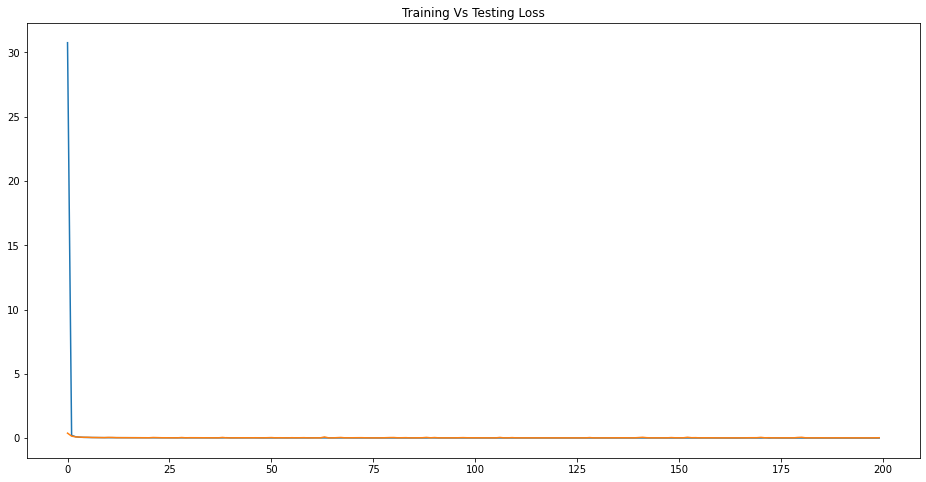

In [44]:
plt.figure(figsize=(16,8))
plt.plot(range(200), history.history['loss'], label = 'Training Loss')
plt.plot(range(200), history.history['val_loss'], label = 'Testing Loss')
plt.title('Training Vs Testing Loss')
plt.show()

In [45]:
min(history.history['loss'])

0.010426663793623447

In [46]:
min(history.history['val_loss'])

0.020551754161715508

#### Without Outliers

In [47]:
def outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    low_lim = q1 - 1.5 * iqr
    upper_lim = q3 + 1.5 * iqr
    data = np.where(data > upper_lim, upper_lim,
                   np.where(data < low_lim, low_lim, data))
    return data

In [50]:
x1 = outliers(x)
y1 = outliers(y)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state=1)

In [52]:
lr = LinearRegression()

In [53]:
score(x_train, x_test, y_train, y_test, lr)

Training Score: 0.8991403501489558
Training Root Mean Squared Error: 0.12165454897159117
Test Score: 0.9146568954181985
Test Root Mean Squared Error: 0.11585824777855513


In [54]:
lr.predict(test)

array([ 2.70164095e+10,  2.29211793e+09, -4.32212340e+09, ...,
       -7.75278576e+09, -2.63754135e+10, -3.53315474e+09])

In [55]:
test = outliers(test)

In [56]:
lr.predict(test)

array([11.68951416, 11.97415161, 12.09857178, ..., 12.14009094,
       11.70359802, 12.34599304])

In [57]:
score(x_train, x_test, y_train, y_test, sv)

Training Score: 0.8816248759494543
Training Root Mean Squared Error: 0.13179527737601943
Test Score: 0.8972498581766267
Test Root Mean Squared Error: 0.1271258741608074


In [58]:
score(x_train, x_test, y_train, y_test, sv1)

Training Score: 0.8995142626791384
Training Root Mean Squared Error: 0.12142883731349709
Test Score: 0.9137190282806666
Test Root Mean Squared Error: 0.11649311305292441


In [59]:
score(x_train, x_test, y_train, y_test, sv2)

Training Score: 0.9150928764023294
Training Root Mean Squared Error: 0.11161991543296698
Test Score: 0.9019797508431013
Test Root Mean Squared Error: 0.1241654132656294


In [60]:
score(x_train, x_test, y_train, y_test, tree)

Training Score: 0.917685448275582
Training Root Mean Squared Error: 0.10990259160017923
Test Score: 0.7906204359303804
Test Root Mean Squared Error: 0.18147210752530787


In [61]:
score(x_train, x_test, y_train, y_test, rf)

Training Score: 0.9324697298564326
Training Root Mean Squared Error: 0.09954486647919042
Test Score: 0.8818916615426837
Test Root Mean Squared Error: 0.13629597077108702


In [62]:
score(x_train, x_test, y_train, y_test, sgd)

Training Score: 0.8425481800672736
Training Root Mean Squared Error: 0.1519999577818096
Test Score: 0.8648090966888475
Test Root Mean Squared Error: 0.14581979127351133


In [63]:
score(x_train, x_test, y_train, y_test, xg)

Training Score: 0.9576686133261973
Training Root Mean Squared Error: 0.07881354683837184
Test Score: 0.9027184133326197
Test Root Mean Squared Error: 0.12369668472464858


In [64]:
from sklearn.neighbors import KNeighborsRegressor

In [65]:
knn = KNeighborsRegressor(n_neighbors=3, leaf_size=45)

In [66]:
score(x_train, x_test, y_train, y_test, knn)

Training Score: 0.8544050254150398
Training Root Mean Squared Error: 0.14616480696910786
Test Score: 0.7554930692798668
Test Root Mean Squared Error: 0.19610484534048256


In [67]:
from sklearn.linear_model import ARDRegression, HuberRegressor

In [68]:
ard = ARDRegression()

In [69]:
score(x_train, x_test, y_train, y_test, ard)

Training Score: 0.8969351364915865
Training Root Mean Squared Error: 0.12297729641810178
Test Score: 0.9148724403921455
Test Root Mean Squared Error: 0.11571184783809142


In [70]:
huber = HuberRegressor(max_iter=2000)

In [71]:
score(x_train, x_test, y_train, y_test, huber)

Training Score: 0.89549133606162
Training Root Mean Squared Error: 0.12383567413992091
Test Score: 0.9168161056073976
Test Root Mean Squared Error: 0.11438323144745521


In [72]:
model = Sequential()

In [73]:
model.add(Dense(units=75, kernel_initializer = 'he_uniform', activation='relu', input_dim=82)) #75
model.add(Dense(units=15, kernel_initializer = 'he_uniform', activation='relu'))
model.add(Dense(units=15, kernel_initializer = 'he_uniform', activation='relu'))
model.add(Dense(units=15, kernel_initializer = 'he_uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer = 'glorot_uniform', activation = 'linear' ))

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 75)                6225      
                                                                 
 dense_6 (Dense)             (None, 15)                1140      
                                                                 
 dense_7 (Dense)             (None, 15)                240       
                                                                 
 dense_8 (Dense)             (None, 15)                240       
                                                                 
 dense_9 (Dense)             (None, 1)                 16        
                                                                 
Total params: 7,861
Trainable params: 7,861
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer='adam', loss= 'MeanSquaredError')

In [76]:
callback = keras.callbacks.ModelCheckpoint(filepath=os.getcwd(), monitor='val_loss', save_best_only=True)

In [77]:
history = model.fit(x= x_train, y= y_train, validation_data=(x_test, y_test), batch_size=10, epochs=200, callbacks=callback)

Epoch 1/200
110/110 [==============================] - 1s 9ms/step - loss: 24.0412 - val_loss: 0.3878
Epoch 2/200
110/110 [==============================] - 1s 7ms/step - loss: 0.1988 - val_loss: 0.0813
Epoch 3/200
110/110 [==============================] - 1s 8ms/step - loss: 0.0600 - val_loss: 0.0408
Epoch 4/200
110/110 [==============================] - 1s 9ms/step - loss: 0.0415 - val_loss: 0.0341
Epoch 5/200
110/110 [==============================] - 1s 7ms/step - loss: 0.0376 - val_loss: 0.0292
Epoch 6/200
110/110 [==============================] - 1s 8ms/step - loss: 0.0330 - val_loss: 0.0272
Epoch 7/200
110/110 [==============================] - 1s 8ms/step - loss: 0.0340 - val_loss: 0.0264
Epoch 8/200
110/110 [==============================] - 1s 7ms/step - loss: 0.0304 - val_loss: 0.0240
Epoch 9/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0309 - val_loss: 0.0264
Epoch 10/200
110/110 [==============================] - 1s 7ms/step - loss: 0.0274 - val_l

110/110 [==============================] - 0s 2ms/step - loss: 0.0242 - val_loss: 0.0305
Epoch 50/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0300 - val_loss: 0.0334
Epoch 51/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0226 - val_loss: 0.0230
Epoch 52/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0291 - val_loss: 0.0481
Epoch 53/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0214 - val_loss: 0.0198
Epoch 54/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0230 - val_loss: 0.0326
Epoch 55/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0228 - val_loss: 0.0174
Epoch 56/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0228 - val_loss: 0.0302
Epoch 57/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0391 - val_loss: 0.0225
Epoch 58/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0242 - val_loss: 

110/110 [==============================] - 0s 2ms/step - loss: 0.0176 - val_loss: 0.0339
Epoch 126/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0169 - val_loss: 0.0436
Epoch 127/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0181 - val_loss: 0.0195
Epoch 128/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0175 - val_loss: 0.0145
Epoch 129/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0156 - val_loss: 0.0317
Epoch 130/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0199 - val_loss: 0.0205
Epoch 131/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0265 - val_loss: 0.0170
Epoch 132/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.0183
Epoch 133/200
110/110 [==============================] - 1s 8ms/step - loss: 0.0159 - val_loss: 0.0139
Epoch 134/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0218 - v

110/110 [==============================] - 0s 2ms/step - loss: 0.0196 - val_loss: 0.0139
Epoch 198/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0184 - val_loss: 0.0151
Epoch 199/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0195 - val_loss: 0.0236
Epoch 200/200
110/110 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.0155


In [99]:
np.sqrt(0.0161)

0.1268857754044952

In [142]:
np.sqrt(0.0126)

0.11224972160321824

In [143]:
model.load_weights(os.getcwd())

In [145]:
mean_squared_error(y_train, model.predict(x_train))

0.013905748706262431

In [146]:
np.sqrt(0.013905748706262431)

0.11792263865035599

In [147]:
mean_squared_error(y_test, model.predict(x_test))

0.012645833845005778

In [148]:
np.sqrt(0.012645833845005778)

0.11245369644883078

In [87]:
from sklearn.ensemble import VotingRegressor

In [94]:
estimator = [('lr', LinearRegression()),
            ('ard', ARDRegression()),
            ('huber', HuberRegressor(max_iter=2000)),
            ('svr', SVR(kernel='poly')),
            ('xgb', XGBRegressor(max_depth=2, learning_rate=0.330000012))]

In [95]:
voting = VotingRegressor(estimators=estimator)

In [96]:
score(x_train, x_test, y_train, y_test, voting)

Training Score: 0.9199692529072652
Training Root Mean Squared Error: 0.1083672519632374
Test Score: 0.9215409159997086
Test Root Mean Squared Error: 0.11108728536046282


In [177]:
ann_score = model.predict(test)

In [178]:
ann_score

array([[11.534462 ],
       [12.265187 ],
       [12.046413 ],
       ...,
       [12.138509 ],
       [11.4126835],
       [12.407476 ]], dtype=float32)

In [159]:
ann_score = np.e**ann_score -1

In [160]:
ann_score

array([[102175.98],
       [212178.28],
       [170485.78],
       ...,
       [186932.55],
       [ 90460.82],
       [244622.61]], dtype=float32)

In [188]:
ann_score.shape

(1459, 1)

In [101]:
ann_submission1 = pd.read_csv('sample_submission.csv')

In [163]:
ann_submission1['SalePrice'] = ann_score

In [164]:
ann_submission1.to_csv('ann_submission1.csv', index=False)

In [98]:
voting_score = voting.predict(test)

In [99]:
voting_score = np.e**voting_score -1

In [100]:
voting_score

array([122144.44647545, 159330.74408177, 183891.87808583, ...,
       181600.239007  , 119287.64900199, 220722.24870258])

In [104]:
voting_submission1 = ann_submission1.copy()

In [106]:
voting_submission1.SalePrice = voting_score

In [107]:
voting_submission1

,Id,SalePrice
0,1461,122144.446475
1,1462,159330.744082
2,1463,183891.878086
3,1464,195184.301150
4,1465,183071.961403
...,...,...
1454,2915,83645.578162
1455,2916,84857.003023
1456,2917,181600.239007
1457,2918,119287.649002


In [108]:
voting_submission1.to_csv('voting_submission1.csv',index=False)